HW1 - Deep Learning

Requirements

In [2]:
!pip3 install numpy scipy
!pip3 install matplotlib

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
import scipy.io
import os

def load_dataset(dataset_name):
    data_path = os.path.join("./Data", f"{dataset_name}.mat")
    mat_data = scipy.io.loadmat(data_path)

    datasets = {
        'X_train': mat_data["Yt"],
        'C_train': mat_data["Ct"],
        'X_validation': mat_data["Yv"],
        'C_validation': mat_data["Cv"]
    }
    return datasets

gmm_dataset = load_dataset("GMMData")
peaks_dataset = load_dataset("PeaksData")
swiss_roll_dataset = load_dataset("SwissRollData")

In [3]:
import matplotlib.pyplot as plt

def generate_gradient_test_plot(epsilons, first_equation, second_equation):
    plt.figure(figsize=(8, 6))

    plt.plot(epsilons, np.abs(first_equation), label=r'$|f(x + \epsilon d) - f(x)|$', marker='o')
    plt.plot(epsilons, np.abs(second_equation), label=r'$|f(x + \epsilon d) - f(x) - \epsilon d^T \nabla f_x|$', marker='x')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel(r'$\epsilon$', fontsize=12)
    plt.ylabel('Value', fontsize=12)
    plt.title('Gradient Test Results')
    plt.legend()
    plt.grid()
    plt.show()



def gradient_test(f, grad_f, dim):
    import numpy as np
    x = np.random.rand(dim)
    grad_f_x = grad_f(x)
    n_points = 15
    epsilons = 0.25 ** np.arange(n_points)
    d = np.random.randn(dim)
    d = d / np.linalg.norm(d)

    first_equation = np.array([f(x+eps*d) - f(x) for eps in epsilons])
    second_equation = np.array([f(x+eps*d) - f(x) - eps*d.T@grad_f_x for eps in epsilons])

    generate_gradient_test_plot(epsilons, first_equation, second_equation)



In [22]:
def softmax_cross_entropy(X, W, C):
    X_t_W = X.T @ W
    exp_X_t_W = np.exp(X_t_W)

    sum_across_columns = np.sum(exp_X_t_W, axis=1)
    matrix = np.tile(sum_across_columns.reshape(-1, 1), W.shape[1])

    element_wise_devision_result = exp_X_t_W / matrix

    log_softmax_X_t_W = np.log(element_wise_devision_result)
    result = C * log_softmax_X_t_W
    loss = np.sum(result)

    return loss

def softmax_cross_entropy_gradient(X, W, C):
    X_t_W = X.T @ W
    exp_X_t_W = np.exp(X_t_W)
    sum_across_columns = np.sum(exp_X_t_W, axis=1)
    matrix = np.tile(sum_across_columns.reshape(-1, 1), W.shape[1])
    element_wise_devision_result = exp_X_t_W / matrix

    result = (1/m) * X @ (element_wise_devision_result - C)

    return result


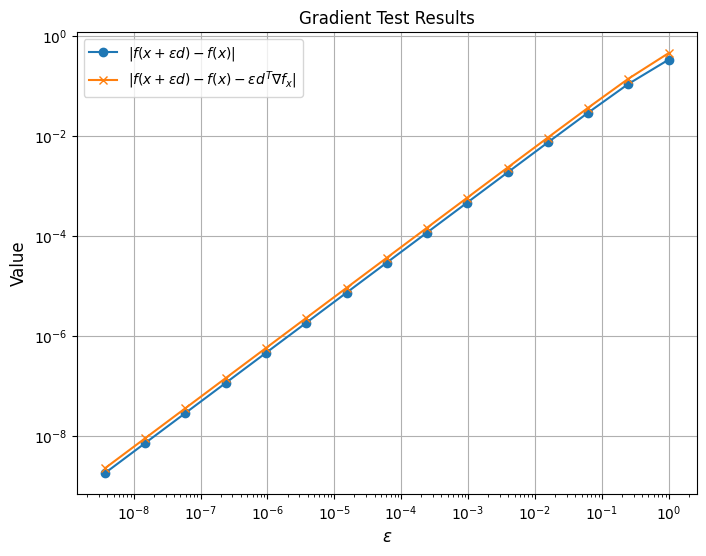

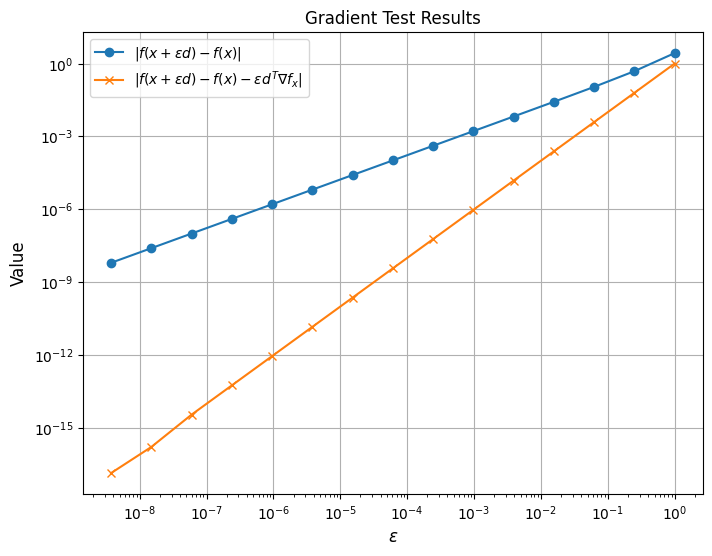

In [23]:
import numpy as np

def add_bias_features(X, W):
    row_of_ones = np.ones((1, X.shape[1]))
    X_star = np.vstack((X, row_of_ones))

    random_row = np.random.rand(1, W.shape[1])
    W_star = np.vstack((W, random_row))

    return X_star, W_star

n = 6
m = 4
l = 3

X = np.random.randn(n, m)
W = np.random.randn(n, l)
C = np.eye(l)[np.array([1, 2, 3, 3]) - 1]

X_star, W_star = add_bias_features(X, W)

def func(w):
    w_new = w.reshape(n+1, l, order='F')
    softmax_cross_entropy_result = softmax_cross_entropy(X_star, w_new, C)

    return softmax_cross_entropy_result

def grad(w):
    w_new = w.reshape(n+1, l, order='F')
    gradient = softmax_cross_entropy_gradient(X_star, w_new, C)
    gradient_vector = gradient.flatten(order='F')

    return gradient_vector

gradient_test(func, grad, (n+1) * l)
gradient_test(lambda x: x**2, lambda x: 2*x, 1)
gradient_test(lambda (x,y):x)

In [ ]:
def sgd():
    pass

In [ ]:
def sgd_with_momentum():
    pass

In [ ]:
''' BONUS PART '''


def rms_prop():
    pass